# Analysis on Global COVID-19 Data in Python

In [22]:
#Data from European Centre for Disease Prevention and Control

In [2]:
%matplotlib inline

In [3]:
import pandas

# Import data from s3

In [4]:
df = pandas.read_excel('s3://mckeown-ia241/COVID-19.xlsx')
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-03,3,5,2020,134,4,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-02,2,5,2020,164,4,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-01,1,5,2020,222,4,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-04-30,30,4,2020,122,0,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-04-29,29,4,2020,124,3,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-04-28,28,4,2020,172,0,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-04-27,27,4,2020,68,10,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-04-26,26,4,2020,112,4,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-04-25,25,4,2020,70,1,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-04-24,24,4,2020,105,2,Afghanistan,AF,AFG,37172386.0,Asia


# 1. Find the Sum of Deaths Per Day Globally

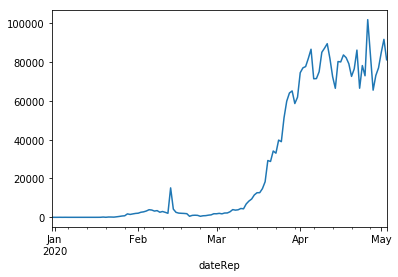

In [15]:
sum_deaths_by_date = df.groupby('dateRep').sum()['cases']

sum_deaths_by_date.plot()

# 2. Find the Top 15 Countries with the Highest Deaths

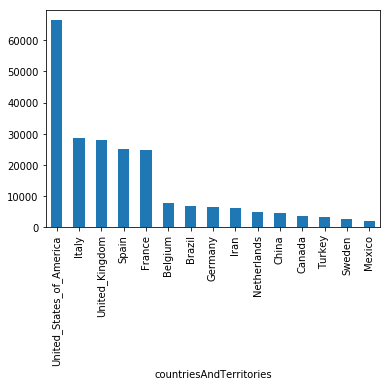

In [16]:
sum_death_by_country = df.groupby('countriesAndTerritories').sum()['deaths']

sum_death_by_country.nlargest(15).plot.bar()

# 3. Look at Spain's Data

In [7]:
spain_data = df.loc[df['countriesAndTerritories']== 'Spain']

spain_data[:10] #using top 10 rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
12550,2020-05-03,3,5,2020,1366,276,Spain,ES,ESP,46723749.0,Europe
12551,2020-05-01,1,5,2020,1781,281,Spain,ES,ESP,46723749.0,Europe
12552,2020-04-30,30,4,2020,518,268,Spain,ES,ESP,46723749.0,Europe
12553,2020-04-29,29,4,2020,2144,453,Spain,ES,ESP,46723749.0,Europe
12554,2020-04-28,28,4,2020,1308,632,Spain,ES,ESP,46723749.0,Europe
12555,2020-04-27,27,4,2020,1831,0,Spain,ES,ESP,46723749.0,Europe
12556,2020-04-26,26,4,2020,1729,288,Spain,ES,ESP,46723749.0,Europe
12557,2020-04-25,25,4,2020,2944,378,Spain,ES,ESP,46723749.0,Europe
12558,2020-04-24,24,4,2020,2767,367,Spain,ES,ESP,46723749.0,Europe
12559,2020-04-23,23,4,2020,3052,440,Spain,ES,ESP,46723749.0,Europe


# 4. Find the Number of Cases in Spain Related to Deaths in the Country

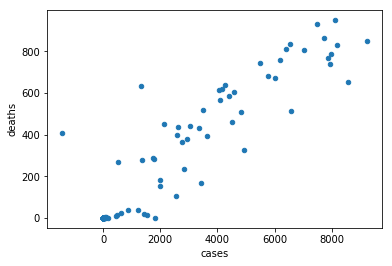

In [18]:
spain_data.plot.scatter(x='cases', y='deaths')

This graph shows the correlation that the more cases there were in Spain, the more deaths occured. 

# 5. Find the Sum Number of Cases in Spain in Months

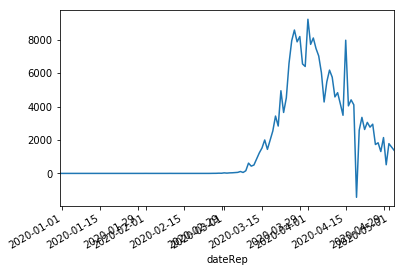

In [8]:
spain_data = df.loc[df['countriesAndTerritories']== 'Spain'].groupby('dateRep').sum()['cases']

spain_data.plot()

# Conclusion

The virus has spread to all parts of the world, but Europe and America have seen the most cases. As case numbers increase,
so does the likelihood of deaths for cases. The peak in this data in cases seemed to be in the month of March.

Limitations include:
    -time frame of which data was collected
    -limited accuracy based on individual country reporting
    -limited test kits on countries skews the reliability
